In [3]:
import numpy as np
import pandas as pd
import os

In [312]:
# NSGA_data  = '../data/routes_short_2023-05-29|15:33:07/'
# curve_data = '../data/routes_short_2023-05-26|17:51:48/'
# data_label = ['NSGA', 'Random']


NSGA_data  = '../data/routes_short_2023-06-09|17:27:05/'
# NSGA_data  = '../data/routes_short_2023-06-09|15:10:37/'
curve_data = '../data/routes_short_2023-05-29|15:33:07/'
data_label = ['New Fitness', '0/1 Fitness'] 

criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        # "RunningRedLightTest",   
                        # "RunningStopTest",       
                        # "InRouteTest", 
                        # "AgentBlockedTest",
                        "Timeout"]

scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"] 


In [313]:
curve_criterions = pd.read_csv(curve_data+'criterion.csv',names=criterion_header)
curve_scenarios = pd.read_csv(curve_data+'scenario.csv',names=scenario_header)

NSGA_criterions = pd.read_csv(NSGA_data+'criterion.csv',names=criterion_header)
NSGA_scenarios = pd.read_csv(NSGA_data+'scenario.csv',names=scenario_header)

print(curve_criterions.shape)
print(NSGA_criterions.shape)

print(curve_scenarios.shape)
print(NSGA_scenarios.shape)

(390, 15)
(390, 15)
(390, 14)
(390, 14)


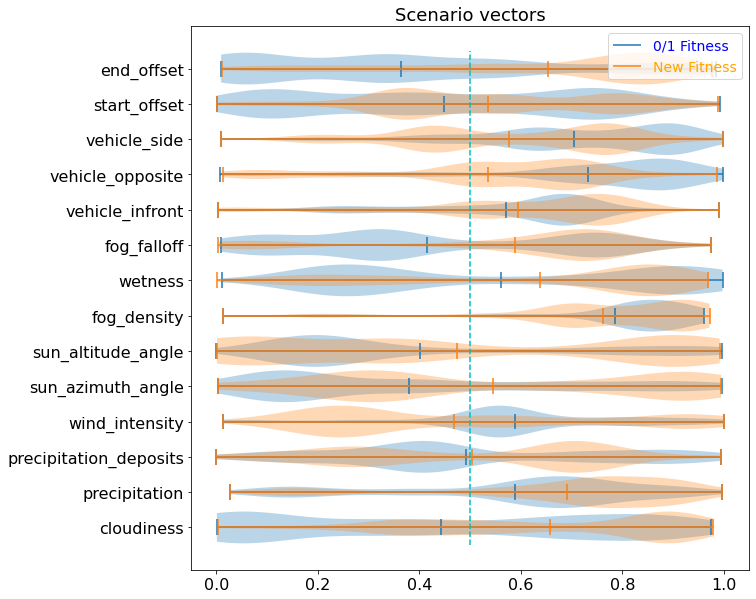

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
vl1 = plt.violinplot(curve_scenarios, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(NSGA_scenarios, vert=False, showmeans=True, widths=0.9)
plt.vlines(0.5, 0.5, 14.5, colors = "c", linestyles = "dashed")
plt.yticks(range(1, 15), scenario_header,fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=[data_label[1],data_label[0]],labelcolor=['blue','orange'],fontsize=14)

plt.show()

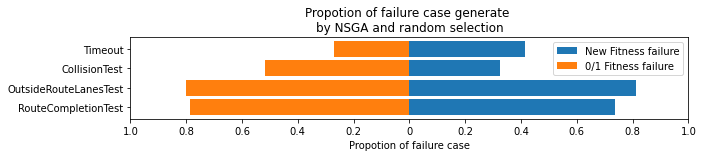

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,1.5))
plt.barh(criterion_bool_head, (NSGA_criterions[criterion_bool_head] == 1).sum()/len(NSGA_criterions))
plt.barh(criterion_bool_head, -(curve_criterions[criterion_bool_head] == 1).sum()/len(curve_criterions))
plt.legend([data_label[0]+' failure',data_label[1]+' failure'])
plt.title('Propotion of failure case generate \nby NSGA and random selection')
plt.xlabel('Propotion of failure case')
plt.xticks(np.arange(-1,1.2,0.2),[1.0,0.8,0.6,0.4,0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.show()

(-0.3087, 0.7539)
(-0.2184, 0.7335)


/home/guannan/miniconda3/envs/TCP/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


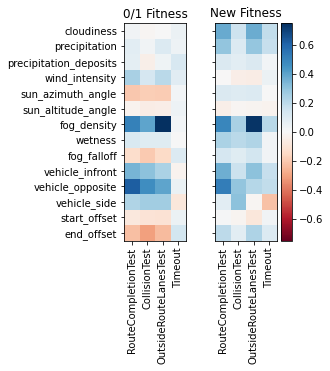

In [316]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3.2, 4), sharey=True)


ax1.set_title(data_label[1])
scenario_criterion = pd.concat([curve_scenarios, curve_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig1 = ax1.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)
# plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)

ax2.set_title(data_label[0])
scenario_criterion = pd.concat([NSGA_scenarios, NSGA_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig2 = ax2.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)

ax1.set_yticks(range(14),scenario_criterion.columns.tolist()[:14])
ax1.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
ax2.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
# plt.yticks([])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
fig.colorbar(fig1, cmap='RdBu')

plt.show()

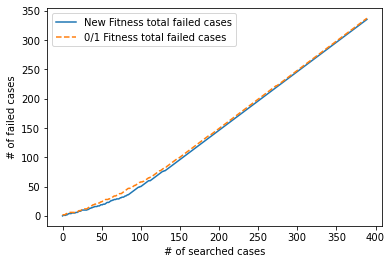

In [317]:
import matplotlib.pyplot as plt

select_criterions = ['RouteCompletionTest', 'CollisionTest', 'OutsideRouteLanesTest', 'Timeout']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
ax.plot(range(len(NSGA_criterions)), 
        get_sum_overtime(NSGA_criterions[select_criterions].sum(axis=1) > 0), 
        label=data_label[0]+' total failed cases')
ax.plot(range(len(NSGA_criterions)), 
        get_sum_overtime(curve_criterions[select_criterions][:len(NSGA_criterions)].sum(axis=1) > 0 ), 
        '--', 
        label=data_label[1]+' total failed cases')

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

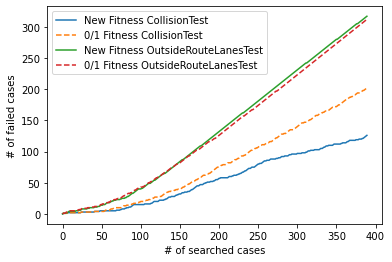

In [318]:
import matplotlib.pyplot as plt

select_criterions = ['CollisionTest', 'OutsideRouteLanesTest']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
for criterion in select_criterions:
    ax.plot(range(len(NSGA_criterions)), 
            get_sum_overtime(NSGA_criterions[criterion]), 
            label = data_label[0]+' '+criterion)
    ax.plot(range(len(NSGA_criterions)), 
            get_sum_overtime(curve_criterions[criterion][:len(NSGA_criterions)]), 
            '--', 
            label = data_label[1]+' '+criterion)

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

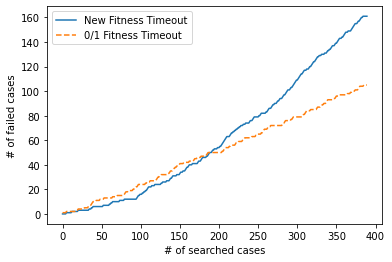

In [319]:
import matplotlib.pyplot as plt

select_criterions = ['Timeout']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
for criterion in select_criterions:
    ax.plot(range(len(NSGA_criterions)), 
            get_sum_overtime(NSGA_criterions[criterion]), 
            label = data_label[0]+' '+criterion)
    ax.plot(range(len(NSGA_criterions)), 
            get_sum_overtime(curve_criterions[criterion][:len(NSGA_criterions)]), 
            '--', 
            label = data_label[1]+' '+criterion)

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

In [320]:
NSGA_frontier  = '../surrogate/routes_short_2023-06-09|17:27:05/output.npz'

NSGA_criterions = 1 - np.load(NSGA_frontier)['arr_1']
NSGA_scenarios  = np.load(NSGA_frontier)['arr_0']

print(NSGA_criterions.shape)
print(NSGA_scenarios.shape)

(32, 3)
(32, 14)


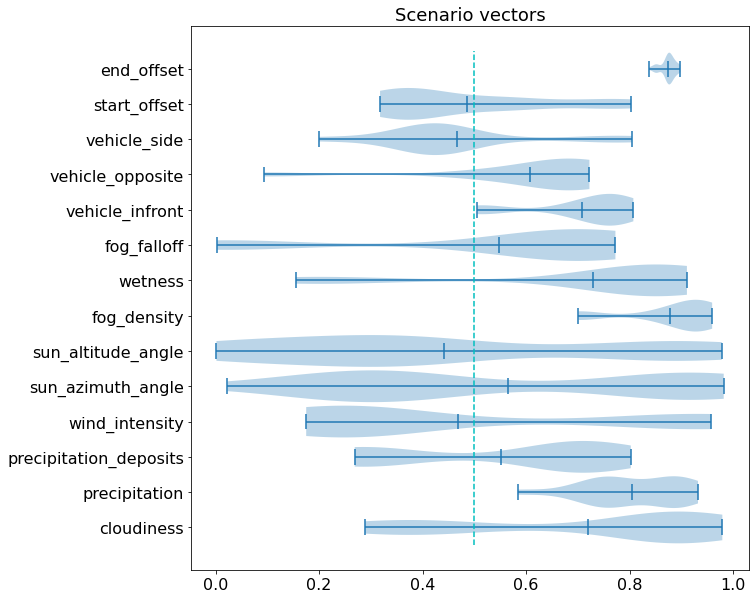

In [321]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# vl1 = plt.violinplot(curve_scenarios, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(NSGA_scenarios, vert=False, showmeans=True, widths=0.9)
plt.vlines(0.5, 0.5, 14.5, colors = "c", linestyles = "dashed")
plt.yticks(range(1, 15), scenario_header,fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
# plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=[data_label[1],data_label[0]],labelcolor=['blue','orange'],fontsize=14)

plt.show()

In [325]:
scenario_criterion = np.concatenate([NSGA_scenarios, NSGA_criterions[:,[0,2,1]]],axis=1)
print(scenario_criterion.shape)
print(np.corrcoef(scenario_criterion.T).shape)
print("({}, {})".format(round(np.corrcoef(scenario_criterion.T)[:14, 14:17].min(), 4), 
                        round(np.corrcoef(scenario_criterion.T)[:14, 14:17].max(), 4)))

(32, 17)
(17, 17)
(-0.7849, 0.9442)


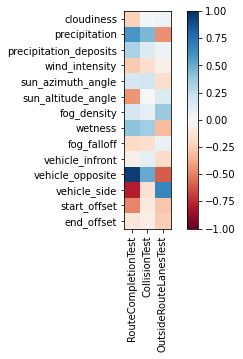

In [327]:
plt.imshow(np.corrcoef(scenario_criterion.T)[:14, 14:17], cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(14), scenario_header)
plt.xticks(range(3), np.array(criterion_bool_head)[[0,2,1]], rotation=90)
plt.colorbar(cmap='RdBu')
plt.show()

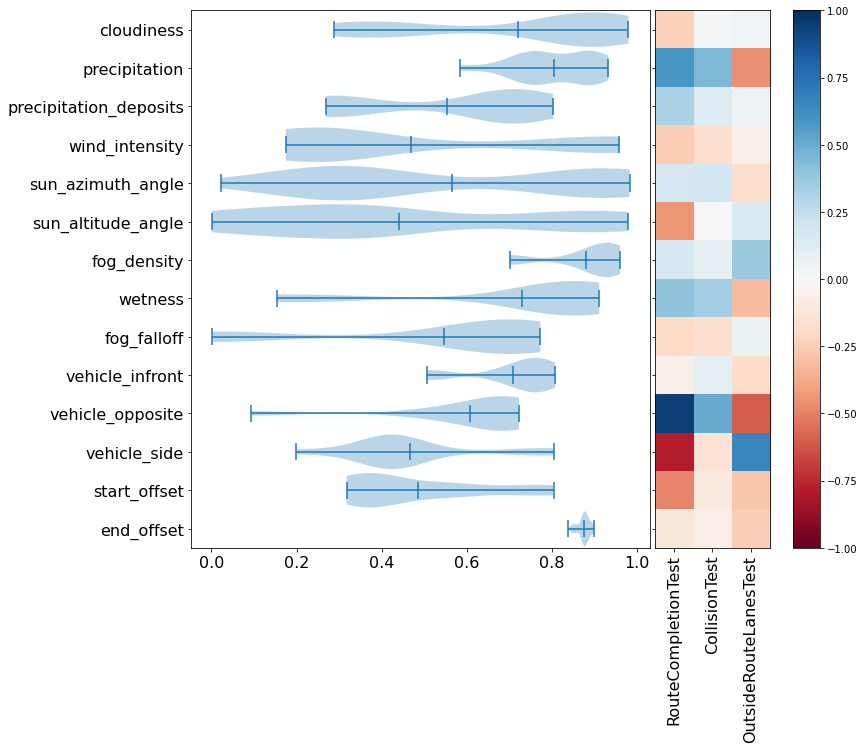

In [328]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
# vl1 = plt.violinplot(curve_scenarios, vert=False, showmeans=True, widths=0.9)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)

# ax1.title("Scenario vectors", fontsize=18)
ax1.violinplot(NSGA_scenarios, vert=False, showmeans=True, widths=0.9, positions=range(0,14))
# ax1.vlines(0.5, 0.5, 14.5, colors = "c", linestyles = "dashed")

# ax2.set_title(data_label[0])
fig.tight_layout()
fig1 = ax2.imshow(np.corrcoef(scenario_criterion.T)[:14, 14:17], cmap='RdBu', vmin=-1, vmax=1)

ax1.set_yticks(range(0, 14), scenario_header,fontsize=16)
ax1.set_xticks(np.arange(0, 1.1, 0.2), [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)
ax2.set_xticks(range(3), np.array(criterion_bool_head)[[0,2,1]], rotation=90, fontsize=16)

fig.subplots_adjust(wspace=-0.54) 
plt.colorbar(fig1, cmap='RdBu')

# plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=[data_label[1],data_label[0]],labelcolor=['blue','orange'],fontsize=14)

plt.show()